In [72]:
file = '363997da-b1c8-49d2-b512-dc7d00f944d5.csv'

In [ ]:
#Null hypothesis or H0:
#The null hypothesis is the one that states that sample observations result purely from chance.
#From an A/B test perspective, the null hypothesis states that there is no difference 
#between the control and variant groups. It states the default position to be tested or the situation as it is now,
#i.e. the status quo. Here our H0 is ” there is no difference 
#in the conversion rate in customers receiving newsletter A and B”.

Alternative Hypothesis or H0:
The alternative hypothesis challenges the null hypothesis 
and is basically a hypothesis that the researcher believes to be true.
The alternative hypothesis is what you might hope that your A/B test will prove to be true.

In [209]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn import datasets, linear_model
import scipy.stats as ss 

In [74]:
df = pd.read_csv(file)

In [75]:
df.head()

,Amount - Order Total,Item - Fill SKU,Item - Price,Item - Qty,Item - SKU,Ship To - State,Date - Order Date
0,374.84,NaN,339.99,1.0,Treadmill-None-0002,CA,5/4/2021 9:48:31 AM
1,359.98,NaN,339.99,1.0,Treadmill-None-0002,FL,5/4/2021 8:44:24 PM
2,100.48,NaN,92.99,1.0,Kid-desk-Blue-002,AZ,5/11/2021 9:57:27 AM
3,259.79,NaN,239.99,1.0,DESK-S-BLK,TX,5/11/2021 5:08:34 PM
4,256.79,NaN,239.99,1.0,DESK-S-BLK,RI,5/15/2021 11:28:40 AM


In [76]:
df.shape

(1510, 7)

In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount - Order Total  1510 non-null   float64
 1   Item - Fill SKU       0 non-null      float64
 2   Item - Price          1487 non-null   float64
 3   Item - Qty            1487 non-null   float64
 4   Item - SKU            1487 non-null   object 
 5   Ship To - State       1510 non-null   object 
 6   Date - Order Date     1510 non-null   object 
dtypes: float64(4), object(3)
memory usage: 82.7+ KB


<AxesSubplot:xlabel='index'>

<Figure size 1440x720 with 0 Axes>

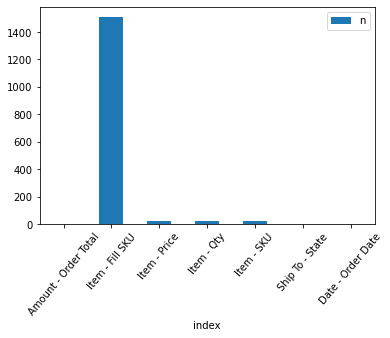

In [78]:
plt.figure(figsize=(20,10))
df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=50)


In [79]:
df.isna().sum()

Amount - Order Total       0
Item - Fill SKU         1510
Item - Price              23
Item - Qty                23
Item - SKU                23
Ship To - State            0
Date - Order Date          0
dtype: int64

In [83]:
df = df.drop('Item - Fill SKU',axis=1)

In [84]:
df

,Amount - Order Total,Item - Price,Item - Qty,Item - SKU,Ship To - State,Date - Order Date
0,374.84,339.99,1.0,Treadmill-None-0002,CA,5/4/2021 9:48:31 AM
1,359.98,339.99,1.0,Treadmill-None-0002,FL,5/4/2021 8:44:24 PM
2,100.48,92.99,1.0,Kid-desk-Blue-002,AZ,5/11/2021 9:57:27 AM
3,259.79,239.99,1.0,DESK-S-BLK,TX,5/11/2021 5:08:34 PM
4,256.79,239.99,1.0,DESK-S-BLK,RI,5/15/2021 11:28:40 AM
...,...,...,...,...,...,...
1505,699.59,659.99,1.0,DBBL-90-TWO-3,MI,9/13/2021 8:37:53 AM
1506,99.99,99.99,1.0,BT-Tripod-007,VA,9/13/2021 10:01:46 AM
1507,97.41,89.99,1.0,BT3-0012-1,TX,9/13/2021 10:53:31 AM
1508,706.19,659.99,1.0,DBBL-90-TWO-3,GA,9/13/2021 11:20:46 AM


<AxesSubplot:xlabel='index'>

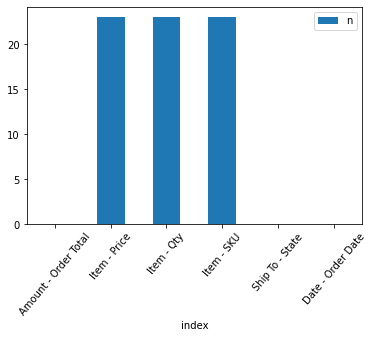

In [91]:
df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=50)


In [92]:
df=df.dropna()

In [103]:
TDF = df[(df['Item - SKU'].str.contains('Tripod')) | (df['Item - SKU'].str.contains('TRIPOD')) ]

In [119]:
TD = TDF.groupby('Item - SKU').size().to_frame('Count').reset_index()

In [120]:
TD

,Item - SKU,Count
0,BT-TRIPOD-01,294
1,BT-Tripod-005,40
2,BT-Tripod-007,30
3,TRIPOD-03,82


<AxesSubplot:xlabel='Item - SKU'>

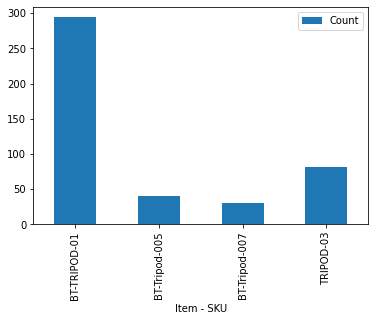

In [130]:
TD.plot.bar(x = 'Item - SKU', y= 'Count')

In [134]:
df['date']= pd.to_datetime(df['Date - Order Date'], errors='coerce')

<ipython-input-134-3d44053d1e2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']= pd.to_datetime(df['Date - Order Date'], errors='coerce')


In [137]:

df['date'] = df.date.dt.to_period('d')

<ipython-input-137-95b327ce15e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.date.dt.to_period('d')


In [140]:
df['date']

0       2021-05-04
1       2021-05-04
2       2021-05-11
3       2021-05-11
4       2021-05-15
           ...    
1504    2021-09-13
1505    2021-09-13
1506    2021-09-13
1507    2021-09-13
1508    2021-09-13
Name: date, Length: 1487, dtype: period[D]

In [142]:
TD1 = df.groupby(['Item - SKU','date']).size().to_frame('Count').reset_index()

In [144]:
TD1 = TD1[(TD1['Item - SKU'].str.contains('Tripod')) | (TD1['Item - SKU'].str.contains('TRIPOD')) ]

In [145]:
TD1

,Item - SKU,date,Count
188,BT-TRIPOD-01,2021-07-06,3
189,BT-TRIPOD-01,2021-07-07,2
190,BT-TRIPOD-01,2021-07-08,4
191,BT-TRIPOD-01,2021-07-09,2
192,BT-TRIPOD-01,2021-07-10,1
...,...,...,...
614,TRIPOD-03,2021-09-06,2
615,TRIPOD-03,2021-09-07,2
616,TRIPOD-03,2021-09-08,1
617,TRIPOD-03,2021-09-10,3


In [149]:
TD1['Item - SKU'].unique()

array(['BT-TRIPOD-01', 'BT-Tripod-005', 'BT-Tripod-007', 'TRIPOD-03'],
      dtype=object)

In [165]:
df1 = pd.crosstab(TD1['date'],TD1['Item - SKU'])

In [166]:
df1

Item - SKU,BT-TRIPOD-01,BT-Tripod-005,BT-Tripod-007,TRIPOD-03
date,,,,
2021-07-06,1,0,0,0
2021-07-07,1,0,0,0
2021-07-08,1,0,1,0
2021-07-09,1,0,1,0
2021-07-10,1,0,1,0
...,...,...,...,...
2021-09-09,1,0,0,0
2021-09-10,1,1,1,1
2021-09-11,1,0,0,0


C:\Users\nancy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BT-Tripod-005', ylabel='Density'>

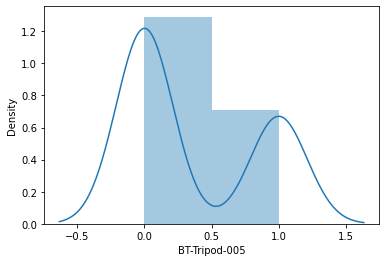

In [186]:
sns.distplot(df1['BT-Tripod-005'])

C:\Users\nancy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BT-TRIPOD-01', ylabel='Density'>

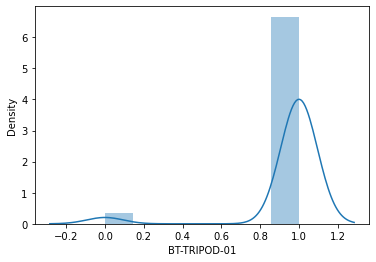

In [187]:
sns.distplot(df1['BT-TRIPOD-01'])

C:\Users\nancy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BT-Tripod-007', ylabel='Density'>

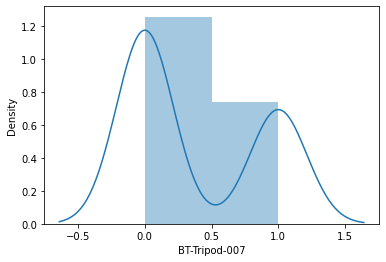

In [188]:
sns.distplot(df1['BT-Tripod-007'])

In [212]:
t_stat , p_val = ss.ttest_ind(df1['BT-TRIPOD-01'],df1['BT-Tripod-007'])

In [213]:
t_stat , p_val

(8.579565172401573, 3.611709062268924e-14)

In [ ]:
#On the calculation of the t-score, we get the t-score as 8.579565172401573. and the p-value is 3.611709062268924e-14.

In [ ]:
#Here, our p-value is less than the significance level i.e 0.05. Hence, 
#we can reject the null hypothesis. This means that in our A/B testing, 
#newsletter BT-TRIPOD-01 is performing better than newsletter BT-Tripod-007. 
#So our recommendation would be to replace our current newsletter with B to bring more sale on our website.